In [1]:
import numpy as np 
import cvxpy as cvx 
import pdb 
import matplotlib.pyplot as plt 

## Problem A11.4

In [2]:
from blend_design_data import *
# W, W_min, W_max, P, D, A, P_spec, D_Spec, A_spec 

In [7]:
print('W_min: %r, W_max: %r' % (W_min, W_max))

W_min: 1.0, W_max: 30.0


In [9]:
success = False 
while not success: 
    blend = np.random.uniform(0,1,W.shape[1])
    blend /= np.sum(blend)
    w_blend_log = np.zeros([W.shape[0],1])
    for i, w in enumerate(blend): 
        w_blend_log += w*np.log(W[:,i])
    w_blend = np.exp(w_blend_log)
    if np.all(w_blend <= W_max) and np.all(w_blend >= W_min):
        success = True
print(w_blend)

[[ 4.71211935]
 [ 5.31026696]
 [ 6.35562937]
 [ 5.60405337]
 [ 5.01635684]
 [ 6.64668485]
 [ 4.72372918]
 [ 5.31424261]
 [ 5.02135301]
 [ 6.19434661]]


## Problem A14.8

In [42]:
h = 1.
g = 0.1
m = 10.
Fmax = 10.
p0 = np.matrix('50 ;50; 100')
v0 = np.matrix('-10; 0; -10')
alpha = 0.5
gamma = 1.
K = 35

In [66]:
A = np.tri(K)
B = np.zeros([35,3])
B[:,2] = np.arange(K)
C = A - np.diag(np.ones(35)*0.5)
end = np.zeros([K,1])
end[K-1] = 1 

In [45]:
p0_= np.zeros([35,3])
p0_[:,0] = p0[0]
p0_[:,1] = p0[1]
p0_[:,1] = p0[2]
v0_ = np.zeros([35,3])
v0_[:,0] = v0[0]
v0_[:,1] = v0[1]
v0_[:,1] = v0[2]

### Minimum Fuel 

In [137]:
f = cvx.Variable(K,3)
f_norm = cvx.norm(f, axis=1)
P_ = P[:, [0,1]] 
P_norm = cvx.norm(P_, axis=1)

In [138]:
V = v0_ + h/m*A*f - B*h*g
V_mag = cvx.norm(V, axis=1)
P = p0_ + h*(C*V + 0.5*v0_)
P_mag = cvx.norm(P, axis=1)
obj = cvx.Minimize(gamma*np.ones(K)*f_norm)
constraints = [
                end.T*V == 0,
                end.T*P == 0,
                f_norm <= Fmax, 
                alpha*P_norm - P[:,2] <= 0
]
prob = cvx.Problem(obj, constraints)

In [139]:
result = prob.solve()
print('Totalfuel burn under optimal profile:', result)
p = P

Totalfuel burn under optimal profile: 159.07066814652188


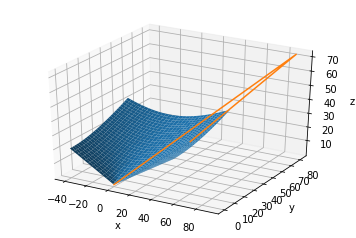

In [140]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0)
#Have your solution be stored in p
ax.plot(xs=p.value[0,:].A1,ys=p.value[1,:].A1,zs=p.value[2,:].A1)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.show()

### Minimum Time 

In [132]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0)
#Have your solution be stored in p

In [156]:
p = p0
v = v0
t_total = 0.0
while np.any(p != 0) and np.any(v != 0):
    f = cvx.Variable(3)
    T = cvx.Variable(1)
    f_norm = cvx.norm(f)
    v_ = v + h/m*f - np.array([0,0,h*g])
    p_ = p + h/2*(v + v_)
#     pdb.set_trace()
    pn = p_[[0,1]] 
    p_norm =cvx.norm(pn)
    
    obj = cvx.Minimize(T)
    constraints = [
#         v + T/m*f - np.array([0, 0, 1])*T*g == 0,
        p + T/2*v == 0,
        alpha*p_norm - p_[2] <= 0,
        f_norm <= Fmax 
    ]
    prob = cvx.Problem(obj, constraints)
    result = prob.solve()
    pdb.set_trace()
    p = np.round(p_.value, 2)
    v = np.round(v_.value, 2)
    t_total += h
#     ax.plot(xs=p.value[0,:].A1,ys=p.value[1,:].A1,zs=p.value[2,:].A1)
#     ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
print(t_total)
# plt.show()

> <ipython-input-156-9f5317581528>(24)<module>()
-> p = np.round(p_.value, 2)
(Pdb) v_.value
(Pdb) prov.status
*** NameError: name 'prov' is not defined
(Pdb) prob.status
'infeasible'
(Pdb) q


BdbQuit: 